# Esercitazione 7
## Esercizio 1
### Punto 1

Creo una funzione _autocorrelation_, che utilizzo per stimare l'autocorrelazione nei diversi casi.

Mostro la funzione di autocorrelazione per $10^4$ valori dell'energia interna U, per i tre stati di aggregazione. Non utilizzo $M=5 \times 10^5$ valori poichè la computazione delle autocorrelazioni diventerebbe estremamente lunga.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def autocorrelation (vec, var_, tmax):
    func = np.zeros(tmax)
    for t in range (tmax-1):
        norm = tmax - t
        sum1 = 0.
        sum2a = 0.
        sum2b = 0.
        for tprimo in range(tmax-t):
            sum1 += vec[tprimo] * vec[tprimo+t]
            sum2a += vec[tprimo]
            sum2b += vec[t+tprimo]
        func [t]  = (sum1 - sum2a*sum2b/norm) / var_ / norm
        if (t%2000==0):
            print ('autoc computed for element %s' %t)
    func[0] = 1
    return func

In [3]:
Us = np.loadtxt("es7_1/1_1_solid/output.istU", usecols=(0), delimiter=',', unpack='true')
Ul = np.loadtxt("es7_1/1_1_liquid/output.istU", usecols=(0), delimiter=',', unpack='true')
Ug = np.loadtxt("es7_1/1_1_gas/output.istU", usecols=(0), delimiter=',', unpack='true')

autoc_s = autocorrelation((Us), np.var(Us), len(Us))
autoc_l = autocorrelation((Ul), np.var(Ul), len(Ul))
autoc_g = autocorrelation((Ug), np.var(Ug), len(Ug))

autoc computed for element 0
autoc computed for element 2000
autoc computed for element 4000
autoc computed for element 6000
autoc computed for element 8000
autoc computed for element 0
autoc computed for element 2000
autoc computed for element 4000
autoc computed for element 6000
autoc computed for element 8000
autoc computed for element 0


KeyboardInterrupt: 

In [ ]:
print ("Solid                                   Liquid                                         Gas")

fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True,figsize=(14, 4))

axs[0].set_ylabel(r"$\chi (t)$")
axs[0].set_xlabel("t")
axs[1].set_xlabel("t")
axs[2].set_xlabel("t")

axs[0].plot(autoc_s[:200])
axs[1].plot(autoc_l[:200])
axs[2].plot(autoc_g[:200])

In [ ]:
Ps = np.loadtxt("es7_1/1_1_solid/output.istP", usecols=(0), delimiter=',', unpack='true')
Pl = np.loadtxt("es7_1/1_1_liquid/output.istP", usecols=(0), delimiter=',', unpack='true')
Pg = np.loadtxt("es7_1/1_1_gas/output.istP", usecols=(0), delimiter=',', unpack='true')

autoc_Ps = autocorrelation(Ps, np.var(Ps), len(Ps))
autoc_Pl = autocorrelation(Pl, np.var(Pl), len(Pl))
autoc_Pg = autocorrelation(Pg, np.var(Pg), len(Pg))

In [ ]:
print ("Solid                                   Liquid                                         Gas")


fig2, axs2 = plt.subplots(1, 3, sharey=True, tight_layout=True,figsize=(14, 5))

axs2[0].set_ylabel(r"$\chi (t)$")
axs2[0].set_xlabel("t")
axs2[1].set_xlabel("t")
axs2[2].set_xlabel("t")
 
axs2[0].plot(autoc_s[:200])
axs2[1].plot(autoc_l[:200])
axs2[2].plot(autoc_g[:200])

Osservo che l'autocorrelazione arriva a zero dopo circa 30 valori calcolati. Pertanto, è necessario che i blocchi abbiano almeno tale dimensione.

### Punto 2

Con i dati generati, computo l'incertezza al variare della dimensione dei blocchi L. Per fare ciò, partendo dai $5 \times 10^5$ dati generati, li raggruppo in un numero variabile di blocchi ed eseguo il calcolo della varianza a blocchi. Mostro di seguito le deviazioni standard per le stime finali dopo una media a blocchi su U e P, per i 3 
stati di aggregazione. Creo una funzione errors per stimare in maniera efficiente le incertezze partendo dal vettore dei valori.

In [ ]:
def errors(L, vec, M):
    err = [None]*len(L)
    k = 0
    for Lblock in (L):
        if (Lblock%1000==0):
            print ("...with L =",Lblock)
        N = int (M/Lblock)
        mean2 = 0
        for Nblock in range(N):
            mean1 = 0
            for i in range (Lblock):
                mean1 += vec[Nblock*Lblock+i]
            mean1 /= Lblock
            mean2 += mean1*mean1
        mean2 /= N
        err[k] = np.sqrt(1./(N)*(mean2-pow(np.mean(vec),2))) 
        k +=1
    return err

L=[]
simulations = ["gas", "liquid", "solid"]
for i in range (20,5000,20):
    L.append(i)

M = 500000

In [ ]:
#ENERGY

U_L, axs_UL = plt.subplots(1, 3, sharey=False, tight_layout=True,figsize=(14, 6))
i= 0
for sim in simulations:
    print('Analysis for the %s state...' % sim)
    U = np.loadtxt("es7_1/1_2_%s/output.istU" %sim, usecols=(0), delimiter=',', unpack='true')
    err = errors(L,U,M)
    axs_UL[i].plot (L,err, linestyle="", marker=".")
    axs_UL[i].set_ylabel(r'$\sigma_{U}$')
    axs_UL[i].set_xlabel("L")
    i +=1
      
print ("         Gas                                Liquid                                         Solid")

#axs_UL[1].plot (L,err_liquid, linestyle="", marker=".")
#axs_UL[2].plot (L,err_solid, linestyle="", marker=".")

In [ ]:
#PRESSURE
P_L, axs_PL = plt.subplots(1, 3, sharey=False, tight_layout=True,figsize=(14, 6))
i= 0
for sim in simulations:
    print('Analysis for the %s state...' % sim)
    P = np.loadtxt("es7_1/1_2_%s/output.istP" %sim, usecols=(0), delimiter=',', unpack='true')
    err = errors(L,P,M)
    axs_PL[i].plot (L,err, linestyle="", marker=".")
    axs_PL[i].set_ylabel(r'$\sigma_{U}$')
    axs_PL[i].set_xlabel("L")
    i +=1

print ("   Gas                                   Liquid                                         Solid")

## Esercizio 2

Calcolo i valori di $g(r)$, dopo aver diviso in bin la dimensione spaziale $r$. Rappresento i valori ottenuti da tale istogramma per i tre stati di aggregazione.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

nblks, bin_value_g, bin_mean_g, bin_error_g  = np.loadtxt("es7_1/2_gas/output.gave.0", usecols=(0,1,2,3), delimiter=',', unpack='true')
nblks, bin_value_l, bin_mean_l, bin_error_l  = np.loadtxt("es7_1/2_liquid/output.gave.0", usecols=(0,1,2,3), delimiter=',', unpack='true')
nblks, bin_value_s, bin_mean_s, bin_error_s  = np.loadtxt("es7_1/1_2_solid/output.gave.0", usecols=(0,1,2,3), delimiter=',', unpack='true')


fig2, axs2 = plt.subplots(1, 3, sharey=True, tight_layout=True,figsize=(14, 6))


axs2[0].set_ylabel(r"$ g(r)$")
axs2[0].set_xlabel("r")
axs2[1].set_xlabel("r")
axs2[2].set_xlabel("r")

axs2[0].errorbar(bin_value_g, bin_mean_g, yerr=bin_error_g, ecolor = "orange")
axs2[1].errorbar(bin_value_l, bin_mean_l, yerr=bin_error_l, ecolor = "orange")
axs2[2].errorbar(bin_value_s, bin_mean_s, yerr=bin_error_s, ecolor = "orange")

print ("          Gas                                   Liquid                                         Solid")

## Esercizio 3-4

Eseguo di nuovo la simulazione del codice implementato nell'esercitazione 4, con dati di input uguali all'esercizio 7.1-2. Rappresento di seguito i risultati per U/N, P e g(r).

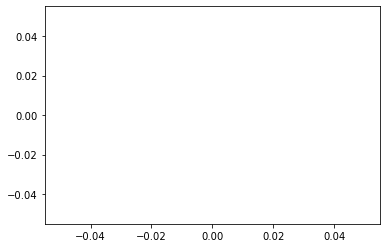

In [7]:
nblks, bin_value_g, bin_mean_g, bin_error_g  = np.loadtxt("es7_3/results/output.gave.0", usecols=(0,1,2,3), delimiter=',', unpack='true')

nblks
bin_value_g


plt.errorbar(bin_value_g, bin_mean_g, yerr=bin_error_g, ecolor = "orange")
plt.show()